In [1]:
!pip install networkx matplotlib seaborn

     |████████████████████████████████| 12.4MB 4.9MB/s eta 0:00:01
     |████████████████████████████████| 225kB 36.9MB/s eta 0:00:01
     |████████████████████████████████| 71kB 25.2MB/s eta 0:00:01
     |████████████████████████████████| 20.2MB 35.1MB/s eta 0:00:01
     |████████████████████████████████| 92kB 26.6MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 42.2MB/s eta 0:00:01
     |████████████████████████████████| 10.0MB 27.7MB/s eta 0:00:01    |█████████████████████           | 6.6MB 27.7MB/s eta 0:00:01
     |████████████████████████████████| 512kB 35.0MB/s eta 0:00:01


In [2]:
import networkx as nx

# Bootstrap Network creation

Social network follows powerlaw distribution (scale-free network), and real world network are mostly a small world, therefore I would like to try adversaries to these two different network structure.
Parameter:
- n = 100

In [3]:
n = 100

In [4]:
from random import seed
import matplotlib.pyplot as plt

In [5]:
n_boostrap = 100

In [6]:
sf_networks = []
for i in range(n_boostrap):
  x = nx.barabasi_albert_graph(n=n , m = 5, seed = 1234)
  sf_networks.append(x)

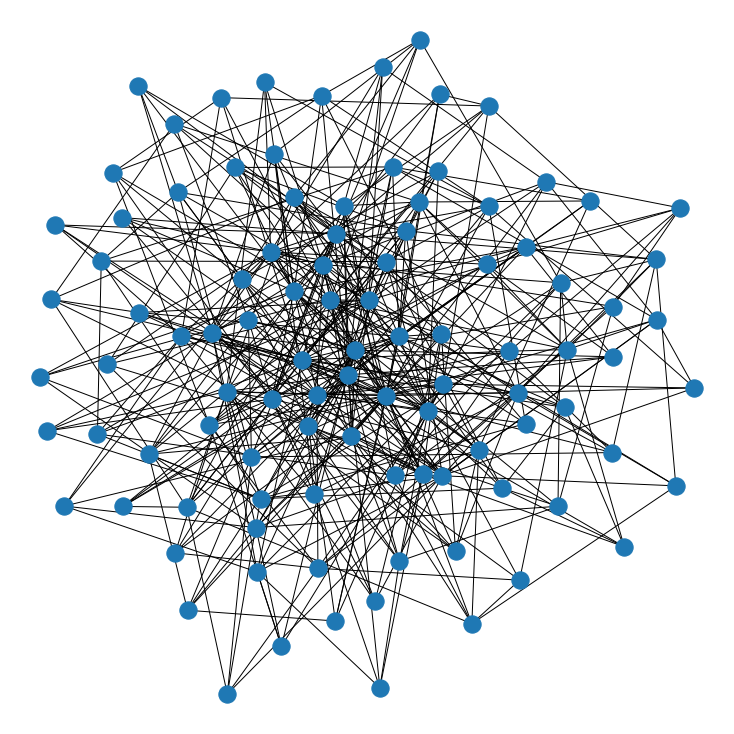

In [7]:
plt.figure(figsize=(10,10))
nx.draw_spring(sf_networks[0])

In [8]:
n=100
k=5
p=0.2

In [9]:
sw_networks = []
for i in range(n_boostrap):
  x = nx.watts_strogatz_graph(n=n, k= k, p = p, seed = 1234)      # 1<=k<=n-1; 0<=p<1
  sw_networks.append(x)

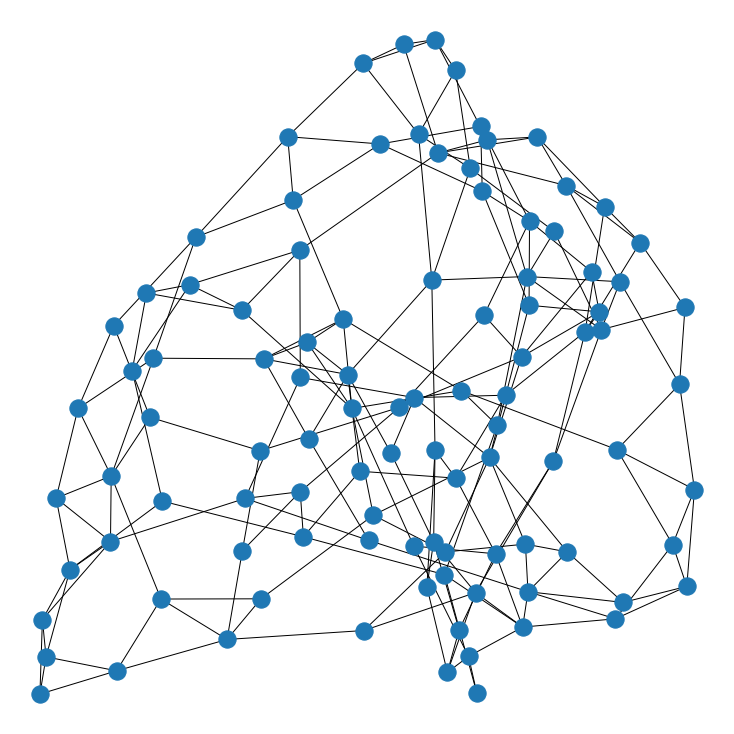

In [10]:
plt.figure(figsize=(10,10))
nx.draw_spring(sw_networks[0])

# create function for add node anywhere

In [11]:
# choose target perturbation random
from random import randint
import random


random.seed(1234)
collect_bootstrap_sw = []
for net_sample in sw_networks:
  #net_sample = net.copy()
  net_sample_add_any = net_sample.copy()
  net_sample_drop_edge_friend = net_sample.copy()
  net_sample_add_foaf = net_sample.copy()

  x =  randint(0,99)
  # get perturbation set
  all_nodes = set(net_sample.nodes)
  target_node = x
  target_friends = set(net_sample.neighbors(target_node))
  perturbation_any_nodes = all_nodes - target_friends - set([target_node])
  # get perturbation friends of friends
  all_target_friends = []
  for x in target_friends:
    all_target_friends.extend(list(net_sample.neighbors(x)))
  all_target_friends = set(all_target_friends)
  perturbation_foafs = all_target_friends - target_friends - set([target_node])


  # pickup random any nodes pertubation
  perturbation_node = random.sample(perturbation_any_nodes,1)[0]
  net_sample_add_any.add_edge(target_node,perturbation_node)
  perturbation_friend = random.sample(target_friends,1)[0]
  net_sample_drop_edge_friend.remove_edge(target_node,perturbation_friend)
  perturbation_foaf = random.sample(perturbation_foafs,1)[0]
  net_sample_add_foaf.add_edge(target_node,perturbation_foaf)
  collect_bootstrap_sw.append([(target_node,net_sample),(perturbation_node,net_sample_add_any),(perturbation_friend,net_sample_drop_edge_friend),(perturbation_foaf,net_sample_add_foaf)])
  # add edge to friend of friend

In [12]:
collect_bootstrap_sw

[[(99, <networkx.classes.graph.Graph at 0x7f648c0215c0>),
  (57, <networkx.classes.graph.Graph at 0x7f6485c0f0f0>),
  (97, <networkx.classes.graph.Graph at 0x7f648c021940>),
  (96, <networkx.classes.graph.Graph at 0x7f648c0210b8>)],
 [(11, <networkx.classes.graph.Graph at 0x7f648c021860>),
  (77, <networkx.classes.graph.Graph at 0x7f648c021748>),
  (9, <networkx.classes.graph.Graph at 0x7f648c021d30>),
  (8, <networkx.classes.graph.Graph at 0x7f648c021ef0>)],
 [(12, <networkx.classes.graph.Graph at 0x7f64ace46748>),
  (49, <networkx.classes.graph.Graph at 0x7f64bc0e07f0>),
  (11, <networkx.classes.graph.Graph at 0x7f6485c0f860>),
  (16, <networkx.classes.graph.Graph at 0x7f6485c0f9b0>)],
 [(3, <networkx.classes.graph.Graph at 0x7f6490e53128>),
  (2, <networkx.classes.graph.Graph at 0x7f6485c0f080>),
  (91, <networkx.classes.graph.Graph at 0x7f6485c0ff60>),
  (92, <networkx.classes.graph.Graph at 0x7f648c6bb4e0>)],
 [(78, <networkx.classes.graph.Graph at 0x7f648ef24b00>),
  (59, <networ

In [13]:
# choose target perturbation random
from random import randint
import random


random.seed(1234)
collect_bootstrap_sf = []
for net_sample in sf_networks:
  #net_sample = net.copy()
  net_sample_add_any = net_sample.copy()
  net_sample_drop_edge_friend = net_sample.copy()
  net_sample_add_foaf = net_sample.copy()

  x =  randint(0,99)
  # get perturbation set
  all_nodes = set(net_sample.nodes)
  target_node = x
  target_friends = set(net_sample.neighbors(target_node))
  perturbation_any_nodes = all_nodes - target_friends - set([target_node])
  # get perturbation friends of friends
  all_target_friends = []
  for x in target_friends:
    all_target_friends.extend(list(net_sample.neighbors(x)))
  all_target_friends = set(all_target_friends)
  perturbation_foafs = all_target_friends - target_friends - set([target_node])


  # pickup random any nodes pertubation
  perturbation_node = random.sample(perturbation_any_nodes,1)[0]
  net_sample_add_any.add_edge(target_node,perturbation_node)
  perturbation_friend = random.sample(target_friends,1)[0]
  net_sample_drop_edge_friend.remove_edge(target_node,perturbation_friend)
  perturbation_foaf = random.sample(perturbation_foafs,1)[0]
  net_sample_add_foaf.add_edge(target_node,perturbation_foaf)
  collect_bootstrap_sf.append([(target_node,net_sample),(perturbation_node,net_sample_add_any),(perturbation_friend,net_sample_drop_edge_friend),(perturbation_foaf,net_sample_add_foaf)])
  # add edge to friend of friend

In [14]:
collect_bootstrap_sf

[[(99, <networkx.classes.graph.Graph at 0x7f64ac895128>),
  (61, <networkx.classes.graph.Graph at 0x7f648ef4f240>),
  (8, <networkx.classes.graph.Graph at 0x7f648ef4f048>),
  (0, <networkx.classes.graph.Graph at 0x7f648ef4f080>)],
 [(11, <networkx.classes.graph.Graph at 0x7f6490703e48>),
  (90, <networkx.classes.graph.Graph at 0x7f648ef4f668>),
  (1, <networkx.classes.graph.Graph at 0x7f648ef4f630>),
  (18, <networkx.classes.graph.Graph at 0x7f648ef4f0f0>)],
 [(12, <networkx.classes.graph.Graph at 0x7f6490e4bf28>),
  (65, <networkx.classes.graph.Graph at 0x7f648ef4f2b0>),
  (20, <networkx.classes.graph.Graph at 0x7f648ef4f0b8>),
  (4, <networkx.classes.graph.Graph at 0x7f648ef4f9e8>)],
 [(3, <networkx.classes.graph.Graph at 0x7f6490e4be10>),
  (2, <networkx.classes.graph.Graph at 0x7f648ef4f5c0>),
  (52, <networkx.classes.graph.Graph at 0x7f648ef4f518>),
  (81, <networkx.classes.graph.Graph at 0x7f648ef4f550>)],
 [(78, <networkx.classes.graph.Graph at 0x7f64ac877860>),
  (64, <networkx

In [15]:
collect_bootstrap_sf[0]

[(99, <networkx.classes.graph.Graph at 0x7f64ac895128>),
 (61, <networkx.classes.graph.Graph at 0x7f648ef4f240>),
 (8, <networkx.classes.graph.Graph at 0x7f648ef4f048>),
 (0, <networkx.classes.graph.Graph at 0x7f648ef4f080>)]

# compute the perturbation result on centrality and network structure

In [16]:
#import pandas as pd
#pd.DataFrame(tt.items()).sort_values(1)[0].values.tolist().index(target_node)

In [17]:
import pandas as pd

output_sf = []
for bs in collect_bootstrap_sf:
  output_dict = {}  
  #output_rank = {}
  target_node = bs[0][0]
  closeness = []
  betweenness = []
  pagerank = []
  clustering = []  
  for x in range(4):
    tt = nx.clustering(bs[x][1])
    pos1 = pd.DataFrame(tt.items()).sort_values(1)[0].values.tolist().index(target_node)    
    clustering.append((tt[target_node],pos1))
    tt = nx.closeness_centrality(bs[x][1])
    pos1 = pd.DataFrame(tt.items()).sort_values(1)[0].values.tolist().index(target_node)    
    closeness.append((tt[target_node],pos1))
    tt = nx.betweenness_centrality(bs[x][1])
    pos1 = pd.DataFrame(tt.items()).sort_values(1)[0].values.tolist().index(target_node)    
    betweenness.append((tt[target_node],pos1))
    tt = nx.pagerank(bs[x][1])
    pos1 = pd.DataFrame(tt.items()).sort_values(1)[0].values.tolist().index(target_node)        
    pagerank.append((tt[target_node],pos1))
  #break
  output_dict["transitivity"] = [nx.transitivity(bs[0][1]),nx.transitivity(bs[1][1]),nx.transitivity(bs[2][1]),nx.transitivity(bs[3][1])]
  output_dict["closeness"] = closeness
  output_dict["betweenness"] = betweenness
  output_dict["pagerank"] = pagerank
  output_dict["clustering"] = clustering
  output_sf.append(output_dict)

In [18]:
output_sw = []
for bs in collect_bootstrap_sw:  
  #output_rank = {}
  output_dict = {}
  target_node = bs[0][0]
  closeness = []
  betweenness = []
  pagerank = []
  clustering = []  
  for x in range(4):
    tt = nx.clustering(bs[x][1])
    pos1 = pd.DataFrame(tt.items()).sort_values(1)[0].values.tolist().index(target_node)        
    clustering.append((tt[target_node],pos1))
    tt = nx.closeness_centrality(bs[x][1])
    pos1 = pd.DataFrame(tt.items()).sort_values(1)[0].values.tolist().index(target_node)    
    closeness.append((tt[target_node],pos1))
    tt = nx.betweenness_centrality(bs[x][1])
    pos1 = pd.DataFrame(tt.items()).sort_values(1)[0].values.tolist().index(target_node)    
    betweenness.append((tt[target_node],pos1))
    tt = nx.pagerank(bs[x][1])
    pos1 = pd.DataFrame(tt.items()).sort_values(1)[0].values.tolist().index(target_node)        
    pagerank.append((tt[target_node],pos1))
    #break
  #break
  output_dict["transitivity"] = [nx.transitivity(bs[0][1]),nx.transitivity(bs[1][1]),nx.transitivity(bs[2][1]),nx.transitivity(bs[3][1])]
  output_dict["closeness"] = closeness
  output_dict["betweenness"] = betweenness
  output_dict["pagerank"] = pagerank
  output_dict["clustering"] = clustering
  output_sw.append(output_dict)

In [19]:
output_sw

[{'transitivity': [0.215625,
   0.21296296296296297,
   0.21293375394321767,
   0.22256568778979907],
  'closeness': [(0.2456575682382134, 61),
   (0.26902173913043476, 84),
   (0.2385542168674699, 53),
   (0.2462686567164179, 61)],
  'betweenness': [(0.040021680349313374, 63),
   (0.07911236757006601, 97),
   (0.02817581534340965, 50),
   (0.045471761226244835, 71)],
  'pagerank': [(0.009806279988486181, 44),
   (0.011718477722042068, 78),
   (0.007824033800972685, 9),
   (0.011612138623519128, 77)],
  'clustering': [(0.16666666666666666, 41), (0.1, 31), (0, 0), (0.3, 54)]},
 {'transitivity': [0.215625,
   0.21362229102167182,
   0.2173228346456693,
   0.21792890262751158],
  'closeness': [(0.23684210526315788, 47),
   (0.2619047619047619, 73),
   (0.1864406779661017, 2),
   (0.25, 63)],
  'betweenness': [(0.04167609520581164, 68),
   (0.06476620247703803, 89),
   (0.011398506667523367, 17),
   (0.04983546210721291, 74)],
  'pagerank': [(0.008199039024988537, 24),
   (0.01013142811896

In [20]:
output_sf

[{'transitivity': [0.15013077593722754,
   0.14986945169712793,
   0.15055272854886823,
   0.1505469699600625],
  'closeness': [(0.4342105263157895, 44),
   (0.43805309734513276, 49),
   (0.4074074074074074, 10),
   (0.45, 59)],
  'betweenness': [(0.0007040986085091069, 1),
   (0.0020079300097702295, 21),
   (0.0002967789477330002, 0),
   (0.0010662676934049217, 4)],
  'pagerank': [(0.005692106055824888, 1),
   (0.006630692479862731, 29),
   (0.004911911444020877, 0),
   (0.0065014507456542855, 29)],
  'clustering': [(0.5, 99),
   (0.3333333333333333, 88),
   (0.6666666666666666, 99),
   (0.4666666666666667, 97)]},
 {'transitivity': [0.15013077593722754,
   0.15059927045336113,
   0.14889512451771308,
   0.15052083333333333],
  'closeness': [(0.5129533678756477, 84),
   (0.515625, 85),
   (0.5051020408163265, 83),
   (0.518324607329843, 88)],
  'betweenness': [(0.02920819092747756, 87),
   (0.03195673925592451, 87),
   (0.027354491195453648, 86),
   (0.03223811462967017, 87)],
  'pager

In [21]:
"""
output_sw = []
for bs in collect_bootstrap_sw:
  output_dict = {}
  target_node = bs[0][0]
  closeness = []
  betweenness = []
  pagerank = []
  clustering = []  
  for x in range(4):
    clustering.append(nx.clustering(bs[x][1])[target_node])
    closeness.append(nx.closeness_centrality(bs[x][1])[target_node])
    betweenness.append(nx.betweenness_centrality(bs[x][1])[target_node])
    pagerank.append(nx.pagerank(bs[x][1])[target_node])
  output_dict["transitivity"] = [nx.transitivity(bs[0][1]),nx.transitivity(bs[1][1]),nx.transitivity(bs[2][1]),nx.transitivity(bs[3][1])]
  output_dict["closeness"] = closeness
  output_dict["betweenness"] = betweenness
  output_dict["pagerank"] = pagerank
  output_dict["clustering"] = clustering
  output_sw.append(output_dict)
"""

'\noutput_sw = []\nfor bs in collect_bootstrap_sw:\n  output_dict = {}\n  target_node = bs[0][0]\n  closeness = []\n  betweenness = []\n  pagerank = []\n  clustering = []  \n  for x in range(4):\n    clustering.append(nx.clustering(bs[x][1])[target_node])\n    closeness.append(nx.closeness_centrality(bs[x][1])[target_node])\n    betweenness.append(nx.betweenness_centrality(bs[x][1])[target_node])\n    pagerank.append(nx.pagerank(bs[x][1])[target_node])\n  output_dict["transitivity"] = [nx.transitivity(bs[0][1]),nx.transitivity(bs[1][1]),nx.transitivity(bs[2][1]),nx.transitivity(bs[3][1])]\n  output_dict["closeness"] = closeness\n  output_dict["betweenness"] = betweenness\n  output_dict["pagerank"] = pagerank\n  output_dict["clustering"] = clustering\n  output_sw.append(output_dict)\n'

In [22]:
key = output_sw[0].keys()
import pandas as pd
output_sw_pd = pd.DataFrame(output_sw)

In [23]:
output_sw_pd

,transitivity,closeness,betweenness,pagerank,clustering
0,"[0.215625, 0.21296296296296297, 0.212933753943...","[(0.2456575682382134, 61), (0.2690217391304347...","[(0.040021680349313374, 63), (0.07911236757006...","[(0.009806279988486181, 44), (0.01171847772204...","[(0.16666666666666666, 41), (0.1, 31), (0, 0),..."
1,"[0.215625, 0.21362229102167182, 0.217322834645...","[(0.23684210526315788, 47), (0.261904761904761...","[(0.04167609520581164, 68), (0.064766202477038...","[(0.008199039024988537, 24), (0.01013142811896...","[(0, 25), (0, 25), (0, 25), (0.166666666666666..."
2,"[0.215625, 0.2132921174652241, 0.2169811320754...","[(0.21521739130434783, 11), (0.239709443099273...","[(0.01344361106265868, 25), (0.043116477528424...","[(0.008443222741794496, 28), (0.01016795669445...","[(0.3333333333333333, 81), (0.1666666666666666..."
3,"[0.215625, 0.21296296296296297, 0.216981132075...","[(0.21153846153846154, 8), (0.2450495049504950...","[(0.015887761904589688, 30), (0.04440768881109...","[(0.008177060635924775, 23), (0.00999856453039...","[(0, 18), (0, 18), (0, 18), (0.166666666666666..."
4,"[0.215625, 0.21362229102167182, 0.212598425196...","[(0.24324324324324326, 55), (0.279661016949152...","[(0.023372343776809905, 43), (0.07460127753437...","[(0.007824081465687577, 11), (0.00974452078885...","[(0.3333333333333333, 65), (0.1666666666666666..."
...,...,...,...,...,...
95,"[0.215625, 0.21296296296296297, 0.217322834645...","[(0.2544987146529563, 65), (0.2804532577903683...","[(0.015504487182446899, 28), (0.05575600040453...","[(0.009730702952935455, 38), (0.01156385794964...","[(0.3333333333333333, 62), (0.2, 50), (0.66666..."
96,"[0.215625, 0.21263482280431434, 0.217665615141...","[(0.2727272727272727, 93), (0.2836676217765043...","[(0.0724255391355277, 94), (0.1017014938151431...","[(0.010501902235781475, 76), (0.01229026576756...","[(0, 23), (0, 23), (0, 23), (0.1, 29)]"
97,"[0.215625, 0.21263482280431434, 0.213270142180...","[(0.2456575682382134, 61), (0.2742382271468144...","[(0.040021680349313374, 63), (0.07286209186483...","[(0.009806279988486181, 44), (0.01158171020892...","[(0.16666666666666666, 41), (0.1, 31), (0, 0),..."
98,"[0.215625, 0.2132921174652241, 0.2129337539432...","[(0.2558139534883721, 70), (0.2742382271468144...","[(0.057981953337631495, 86), (0.09218398440338...","[(0.01026705779839511, 70), (0.012261446211394...","[(0.16666666666666666, 45), (0.1, 29), (0, 26)..."


In [24]:
output_sw_pd

,transitivity,closeness,betweenness,pagerank,clustering
0,"[0.215625, 0.21296296296296297, 0.212933753943...","[(0.2456575682382134, 61), (0.2690217391304347...","[(0.040021680349313374, 63), (0.07911236757006...","[(0.009806279988486181, 44), (0.01171847772204...","[(0.16666666666666666, 41), (0.1, 31), (0, 0),..."
1,"[0.215625, 0.21362229102167182, 0.217322834645...","[(0.23684210526315788, 47), (0.261904761904761...","[(0.04167609520581164, 68), (0.064766202477038...","[(0.008199039024988537, 24), (0.01013142811896...","[(0, 25), (0, 25), (0, 25), (0.166666666666666..."
2,"[0.215625, 0.2132921174652241, 0.2169811320754...","[(0.21521739130434783, 11), (0.239709443099273...","[(0.01344361106265868, 25), (0.043116477528424...","[(0.008443222741794496, 28), (0.01016795669445...","[(0.3333333333333333, 81), (0.1666666666666666..."
3,"[0.215625, 0.21296296296296297, 0.216981132075...","[(0.21153846153846154, 8), (0.2450495049504950...","[(0.015887761904589688, 30), (0.04440768881109...","[(0.008177060635924775, 23), (0.00999856453039...","[(0, 18), (0, 18), (0, 18), (0.166666666666666..."
4,"[0.215625, 0.21362229102167182, 0.212598425196...","[(0.24324324324324326, 55), (0.279661016949152...","[(0.023372343776809905, 43), (0.07460127753437...","[(0.007824081465687577, 11), (0.00974452078885...","[(0.3333333333333333, 65), (0.1666666666666666..."
...,...,...,...,...,...
95,"[0.215625, 0.21296296296296297, 0.217322834645...","[(0.2544987146529563, 65), (0.2804532577903683...","[(0.015504487182446899, 28), (0.05575600040453...","[(0.009730702952935455, 38), (0.01156385794964...","[(0.3333333333333333, 62), (0.2, 50), (0.66666..."
96,"[0.215625, 0.21263482280431434, 0.217665615141...","[(0.2727272727272727, 93), (0.2836676217765043...","[(0.0724255391355277, 94), (0.1017014938151431...","[(0.010501902235781475, 76), (0.01229026576756...","[(0, 23), (0, 23), (0, 23), (0.1, 29)]"
97,"[0.215625, 0.21263482280431434, 0.213270142180...","[(0.2456575682382134, 61), (0.2742382271468144...","[(0.040021680349313374, 63), (0.07286209186483...","[(0.009806279988486181, 44), (0.01158171020892...","[(0.16666666666666666, 41), (0.1, 31), (0, 0),..."
98,"[0.215625, 0.2132921174652241, 0.2129337539432...","[(0.2558139534883721, 70), (0.2742382271468144...","[(0.057981953337631495, 86), (0.09218398440338...","[(0.01026705779839511, 70), (0.012261446211394...","[(0.16666666666666666, 45), (0.1, 29), (0, 26)..."


In [25]:
betweenness = pd.DataFrame(tuple(output_sw_pd.betweenness.values.flatten()))
betweenness[0].apply(lambda x:x[0])

0     0.040022
1     0.041676
2     0.013444
3     0.015888
4     0.023372
        ...   
95    0.015504
96    0.072426
97    0.040022
98    0.057982
99    0.060816
Name: 0, Length: 100, dtype: float64

In [26]:
def render_df(transitivity,label):
  rrr = pd.DataFrame()
  rr = pd.DataFrame(transitivity[["d1","r1"]].values)
  rr["type"] = "add_node_any"
  rr["value"] = label
  rrr = rrr.append(rr)
  rr = pd.DataFrame(transitivity[["d2","r2"]].values)
  rr["type"] = "drop_friend"
  rr["value"] = label
  rrr = rrr.append(rr)
  rr = pd.DataFrame(transitivity[["d3","r3"]].values)
  rr["type"] = "add_foaf"
  rr["value"] = label
  rrr = rrr.append(rr)
  return rrr

"""
arr = render_df(transitivity,"transitivity")
arr = arr.append(render_df(closeness,"closeness"))
arr = arr.append(render_df(betweenness,"betweenness"))
arr = arr.append(render_df(pagerank,"pagerank"))
arr = arr.append(render_df(clustering,"clustering"))

arr = arr.rename(columns={0:"delta_eval"})
"""

'\narr = render_df(transitivity,"transitivity")\narr = arr.append(render_df(closeness,"closeness"))\narr = arr.append(render_df(betweenness,"betweenness"))\narr = arr.append(render_df(pagerank,"pagerank"))\narr = arr.append(render_df(clustering,"clustering"))\n\narr = arr.rename(columns={0:"delta_eval"})\n'

In [27]:
def compute_delta_eval(output_sw_pd):
  transitivity = pd.DataFrame(tuple(output_sw_pd.transitivity.values.flatten()))
  betweenness = pd.DataFrame(tuple(output_sw_pd.betweenness.values.flatten()))
  closeness = pd.DataFrame(tuple(output_sw_pd.closeness.values.flatten()))
  pagerank = pd.DataFrame(tuple(output_sw_pd.pagerank.values.flatten()))
  clustering = pd.DataFrame(tuple(output_sw_pd.clustering.values.flatten()))
  transitivity["d1"] = transitivity[1]-transitivity[0]
  transitivity["d2"] = transitivity[2]-transitivity[0]
  transitivity["d3"] = transitivity[3]-transitivity[0]
  transitivity["r1"] = 0
  transitivity["r2"] = 0
  transitivity["r3"] = 0
  #transitivity.describe()
  def eval_ext(df):
    return df.apply(lambda x:x[0]).values
  def rank_ext(df):
    return df.apply(lambda x:x[1]).values
  betweenness["d1"] = eval_ext(betweenness[1])-eval_ext(betweenness[0])
  print(eval_ext(betweenness[1]))
  betweenness["d2"] = eval_ext(betweenness[2])-eval_ext(betweenness[0])
  betweenness["d3"] = eval_ext(betweenness[3])-eval_ext(betweenness[0])
  betweenness["r1"] = rank_ext(betweenness[1])-rank_ext(betweenness[0])
  betweenness["r2"] = rank_ext(betweenness[2])-rank_ext(betweenness[0])
  betweenness["r3"] = rank_ext(betweenness[3])-rank_ext(betweenness[0])

  #betweenness.describe()
  closeness["d1"] = eval_ext(closeness[1])-eval_ext(closeness[0])
  closeness["d2"] = eval_ext(closeness[2])-eval_ext(closeness[0])
  closeness["d3"] = eval_ext(closeness[3])-eval_ext(closeness[0])
  closeness["r1"] = rank_ext(closeness[1])-rank_ext(closeness[0])
  closeness["r2"] = rank_ext(closeness[2])-rank_ext(closeness[0])
  closeness["r3"] = rank_ext(closeness[3])-rank_ext(closeness[0])
  #closeness.describe()
  pagerank["d1"] = eval_ext(pagerank[1])-eval_ext(pagerank[0])
  pagerank["d2"] = eval_ext(pagerank[2])-eval_ext(pagerank[0])
  pagerank["d3"] = eval_ext(pagerank[3])-eval_ext(pagerank[0])
  pagerank["r1"] = rank_ext(pagerank[1])-rank_ext(pagerank[0])
  pagerank["r2"] = rank_ext(pagerank[2])-rank_ext(pagerank[0])
  pagerank["r3"] = rank_ext(pagerank[3])-rank_ext(pagerank[0])
  #pagerank.describe()
  clustering["d1"] = eval_ext(clustering[1])-eval_ext(clustering[0])
  clustering["d2"] = eval_ext(clustering[2])-eval_ext(clustering[0])
  clustering["d3"] = eval_ext(clustering[3])-eval_ext(clustering[0])
  clustering["r1"] = rank_ext(clustering[1])-rank_ext(clustering[0])
  clustering["r2"] = rank_ext(clustering[2])-rank_ext(clustering[0])
  clustering["r3"] = rank_ext(clustering[3])-rank_ext(clustering[0])
  #clustering.describe()

  arr = render_df(transitivity,"transitivity")
  arr = arr.append(render_df(closeness,"closeness"))
  arr = arr.append(render_df(betweenness,"betweenness"))
  arr = arr.append(render_df(pagerank,"pagerank"))
  arr = arr.append(render_df(clustering,"clustering"))

  arr = arr.rename(columns={0:"delta_eval",1:"delta_rank"})
  return arr

In [28]:
arr_sw_pd = compute_delta_eval(output_sw_pd)
#arr_sw_pd

[0.07911237 0.0647662  0.04311648 0.04440769 0.07460128 0.13236092
 0.02844675 0.06854775 0.0974161  0.11353461 0.08169752 0.04524033
 0.04395131 0.07460473 0.02377564 0.12961116 0.06706369 0.09390223
 0.06644242 0.07032873 0.04818294 0.08946216 0.09237357 0.03249451
 0.15883741 0.13502678 0.0833396  0.03496618 0.02375551 0.03131077
 0.09419075 0.12756483 0.07896521 0.09310546 0.07518871 0.07308904
 0.13277629 0.12114766 0.04312055 0.03523183 0.08129759 0.13300451
 0.09314484 0.03702513 0.05904715 0.08744384 0.05397129 0.03085424
 0.1422782  0.08163635 0.02753901 0.04266548 0.04445266 0.01984696
 0.03220291 0.13433221 0.10021101 0.05043895 0.0602852  0.07997544
 0.09627928 0.07007084 0.0429178  0.0512581  0.09513041 0.07342586
 0.03572852 0.03611579 0.07164049 0.04166553 0.06616224 0.06494255
 0.05030277 0.08158916 0.00603723 0.06035237 0.08010518 0.03397796
 0.10426995 0.14097777 0.07160486 0.14058132 0.04686202 0.0205486
 0.08969762 0.0397937  0.04906696 0.06248836 0.10411219 0.04094

In [29]:
arr_sw_pd.describe()

,delta_eval,delta_rank
count,1500.000000,1500.000000
mean,0.005221,3.797333
std,0.060489,20.019143
min,-0.333333,-71.000000
25%,-0.002662,-3.000000
50%,0.001775,0.000000
75%,0.011206,15.000000
max,0.666667,77.000000


In [30]:
arr_sf_pd = compute_delta_eval(pd.DataFrame(output_sf))

[0.00200793 0.03195674 0.04544129 0.02668724 0.00415161 0.01023423
 0.00871545 0.00413352 0.0014031  0.05456747 0.00331498 0.01688701
 0.01536363 0.0107968  0.00646797 0.00382623 0.00237374 0.00570406
 0.00154778 0.00267326 0.009011   0.01685037 0.01661404 0.00245832
 0.00475569 0.00903279 0.0018529  0.00371485 0.00175613 0.00887632
 0.00316341 0.04543324 0.01514463 0.06045905 0.10472442 0.00397666
 0.01299235 0.06150347 0.01660828 0.00405814 0.01011678 0.00365147
 0.01045192 0.00246155 0.01505743 0.05408301 0.00219534 0.00214126
 0.00320576 0.00309236 0.00219843 0.00466758 0.00556891 0.03303372
 0.0181043  0.01979516 0.01279265 0.00219405 0.00815459 0.03819815
 0.01147051 0.0164721  0.00188336 0.0038517  0.00647677 0.00844926
 0.00224431 0.01318701 0.00202683 0.00205491 0.00583418 0.00935384
 0.06055096 0.01273733 0.00514243 0.00543928 0.02459592 0.01368833
 0.00143939 0.01163423 0.01117332 0.00357235 0.00209446 0.02305241
 0.01717428 0.00534956 0.0070116  0.01106998 0.00234247 0.0239

In [31]:
arr_sw_pd["graph_type"] = "small world"
arr_sf_pd["graph_type"] = "scale free"
arr_all_pd = arr_sw_pd.append(arr_sf_pd)

In [32]:
arr_all_pd

,delta_eval,delta_rank,type,value,graph_type
0,-0.002662,0.0,add_node_any,transitivity,small world
1,-0.002003,0.0,add_node_any,transitivity,small world
2,-0.002333,0.0,add_node_any,transitivity,small world
3,-0.002662,0.0,add_node_any,transitivity,small world
4,-0.002003,0.0,add_node_any,transitivity,small world
...,...,...,...,...,...
95,0.001671,0.0,add_foaf,clustering,scale free
96,0.063492,6.0,add_foaf,clustering,scale free
97,0.035714,0.0,add_foaf,clustering,scale free
98,0.107143,30.0,add_foaf,clustering,scale free


In [33]:
transitivity = pd.DataFrame(tuple(output_sw_pd.transitivity.values.flatten()))
betweenness = pd.DataFrame(tuple(output_sw_pd.betweenness.values.flatten()))
closeness = pd.DataFrame(tuple(output_sw_pd.closeness.values.flatten()))
pagerank = pd.DataFrame(tuple(output_sw_pd.pagerank.values.flatten()))
clustering = pd.DataFrame(tuple(output_sw_pd.clustering.values.flatten()))


In [34]:
transitivity["d1"] = transitivity[1]-transitivity[0]
transitivity["d2"] = transitivity[2]-transitivity[0]
transitivity["d3"] = transitivity[3]-transitivity[0]
transitivity.describe()

,0,1,2,3,d1,d2,d3
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.215625,0.213490,0.215414,0.217984,-0.002135,-0.000211,0.002359
std,0.000000,0.001779,0.002852,0.001562,0.001779,0.002852,0.001562
min,0.215625,0.211656,0.208202,0.215926,-0.003969,-0.007423,0.000301
25%,0.215625,0.212635,0.212934,0.217257,-0.002990,-0.002691,0.001632
50%,0.215625,0.212963,0.217323,0.217593,-0.002662,0.001698,0.001968
75%,0.215625,0.213292,0.217666,0.217929,-0.002333,0.002041,0.002304
max,0.215625,0.222222,0.218700,0.222566,0.006597,0.003075,0.006941


In [35]:
import seaborn as sns

In [36]:
"""
def render_df(transitivity,label):
  rrr = pd.DataFrame()
  rr = pd.DataFrame(transitivity[["d1","r1"]].values)
  rr["type"] = "add_node_any"
  rr["value"] = label
  rrr = rrr.append(rr)
  rr = pd.DataFrame(transitivity[["d2","r2"]].values)
  rr["type"] = "drop_friend"
  rr["value"] = label
  rrr = rrr.append(rr)
  rr = pd.DataFrame(transitivity[["d3","r3"]].values)
  rr["type"] = "add_foaf"
  rr["value"] = label
  rrr = rrr.append(rr)
  return rrr

arr = render_df(transitivity,"transitivity")
arr = arr.append(render_df(closeness,"closeness"))
arr = arr.append(render_df(betweenness,"betweenness"))
arr = arr.append(render_df(pagerank,"pagerank"))
arr = arr.append(render_df(clustering,"clustering"))

arr = arr.rename(columns={0:"delta_eval"})
"""

'\ndef render_df(transitivity,label):\n  rrr = pd.DataFrame()\n  rr = pd.DataFrame(transitivity[["d1","r1"]].values)\n  rr["type"] = "add_node_any"\n  rr["value"] = label\n  rrr = rrr.append(rr)\n  rr = pd.DataFrame(transitivity[["d2","r2"]].values)\n  rr["type"] = "drop_friend"\n  rr["value"] = label\n  rrr = rrr.append(rr)\n  rr = pd.DataFrame(transitivity[["d3","r3"]].values)\n  rr["type"] = "add_foaf"\n  rr["value"] = label\n  rrr = rrr.append(rr)\n  return rrr\n\narr = render_df(transitivity,"transitivity")\narr = arr.append(render_df(closeness,"closeness"))\narr = arr.append(render_df(betweenness,"betweenness"))\narr = arr.append(render_df(pagerank,"pagerank"))\narr = arr.append(render_df(clustering,"clustering"))\n\narr = arr.rename(columns={0:"delta_eval"})\n'

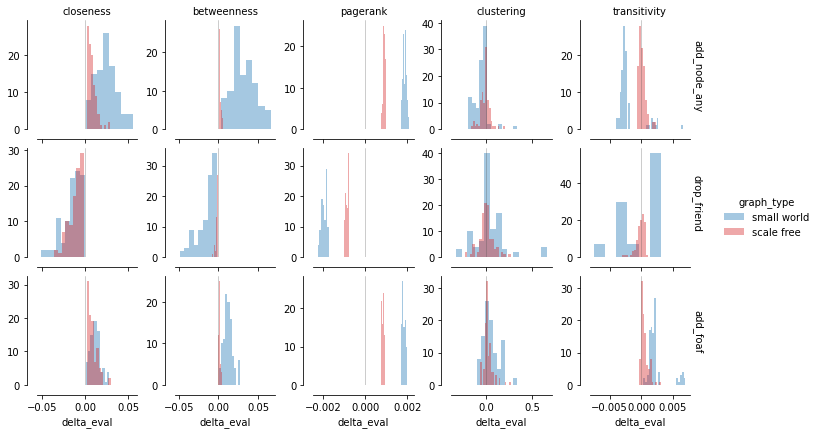

In [37]:
#df = df_small
hue_order = ['small world', 'scale free']
palette = ["tab:blue",  "tab:red" ]
col_order = ["closeness","betweenness","pagerank","clustering","transitivity"]
g = sns.FacetGrid(
    col="value", 
    row="type", 
    hue="graph_type",
    data=arr_all_pd,
    height=2, aspect=1,
    #hue_order=hue_order,
    col_order=col_order,
    #row_order=sorted(df.graph.unique()),
    palette=palette,
    sharex="col",
    sharey=False,
    margin_titles=True
)
g = g.map(plt.axvline, x=0, color="0.3", lw=0.5, alpha=0.3);
g = g.map(
    sns.distplot, "delta_eval", kde=False
).add_legend().despine(offset=10)
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');
#print(plt.get("yticklabels"))
#g.set_yticklabels(range(0,100))
#g.set(ylim=(0,50))
#plt.savefig(f"./figures/small-net_outcome_difference_comparison.pdf", bbox_inches="tight")

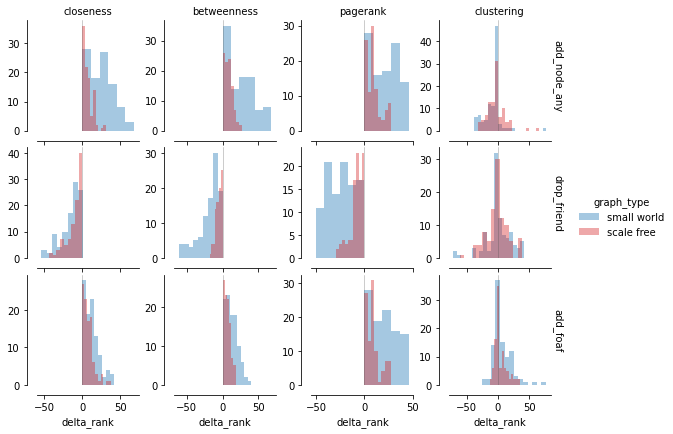

In [38]:
#df = df_small
hue_order = ['small world', 'scale free']
palette = ["tab:blue",  "tab:red" ]
col_order = ["closeness","betweenness","pagerank","clustering"]
g = sns.FacetGrid(
    col="value", 
    row="type", 
    hue="graph_type",
    data=arr_all_pd[arr_all_pd["value"]!="transitivity"],
    height=2, aspect=1,
    #hue_order=hue_order,
    col_order=col_order,
    #row_order=sorted(df.graph.unique()),
    palette=palette,
    sharex="col",
    sharey=False,
    margin_titles=True
)
g = g.map(plt.axvline, x=0, color="0.3", lw=0.5, alpha=0.3);
g = g.map(
    sns.distplot, "delta_rank", kde=False
).add_legend().despine(offset=10)
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '{row_name}', col_template = '{col_name}');
#print(plt.get("yticklabels"))
#g.set_yticklabels(range(0,100))
#g.set(ylim=(0,50))
#plt.savefig(f"./figures/small-net_outcome_difference_comparison.pdf", bbox_inches="tight")

In [39]:
print(arr_all_pd.columns)
arr_all_pd.groupby(["graph_type","type","value"]).mean().to_csv("experiment_result.csv")

Index(['delta_eval', 'delta_rank', 'type', 'value', 'graph_type'], dtype='object')
